## Exercise in Photogrammetry I
## **Ex.2 : Computer Vision**
### Points: 22

## Images: Cube Slicing
In this course we will deal a lot with images, so that the handling of these should feel quite familiar to you.
An image in python is typically represented as a 3 dimensional numpy array *(rows, cols, channel)*. We will use matplotlib for the visualization and skimage for reading and writing to disk. 

**Task:** Import *pyplot* from *matplotlib* as well as *skimage.io*. (1 Point)

In [4]:
# Import pyplot and skimange.io, enable inline matplot
import matplotlib.pyplot as plt 
import skimage.io as skio
%matplotlib inline

**Tasks:**
1. Load and visualize the image: *images/cube.jpg* (1 Point)
2. print the shape of the image as well as the underlying data type. (1 Point)
3. create two variables which hold the left and the right half of the image, respectively. Make sure that both parts have the same size and plot both images. **Hint:** use subplots (see example below) (3 Points)
4. flip the right image vertically. (1 Point)
5. Convert the left and the right flipped image to uint8 for later computations.  (1 Points)
6. Compute the absolute difference between the left and the right flipped image. (1 Point)
7. Convert the difference image back to uint8 and visualize it. (1 Point)

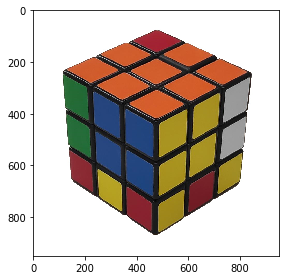

In [7]:
#1. Load and visualize image
img = skio.imread('./images/cube.jpg')
skio.imshow(img)

In [8]:
#2. Print the shape and underlying data type 
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(950, 950, 3)


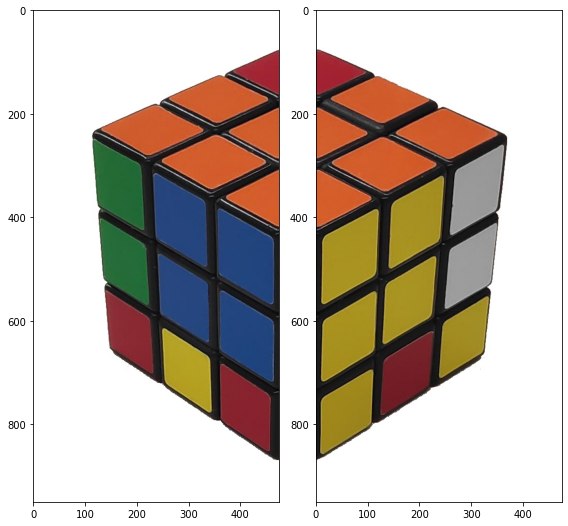

In [14]:
#3. Split image in left and right half:
img_left = img[:, 0:475, :]  # W, H, C
img_right = img[:, 475:, :]

# Display use subplots

fig, axes = plt.subplots(1, 2, figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(img_left)
ax[1].imshow(img_right)

fig.tight_layout()
plt.show()

In [16]:
# Check size
assert(img_left.shape == img_right.shape)

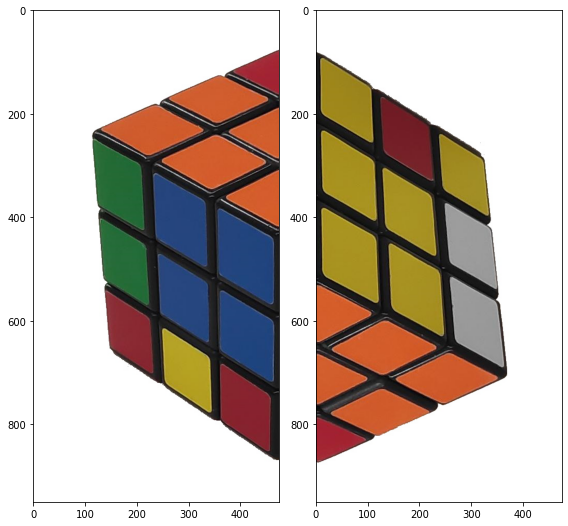

In [25]:
#4. Flip right image and plot the result
import numpy as np

img_right = np.flipud(img_right) # Flip vertically

# Plot result 
fig, axes = plt.subplots(1, 2, figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(img_left)
ax[1].imshow(img_right)

fig.tight_layout()
plt.show()

In [29]:
#5. Convert the left and right flipped image to uint8 
print(img_left.dtype)
print(img_right.dtype)

uint8
uint8


In [38]:
#6. Compute absolute different of 2 image 
abs_different = np.absolute(img_right - img_left)

In [33]:
print(abs_different.dtype)

uint8


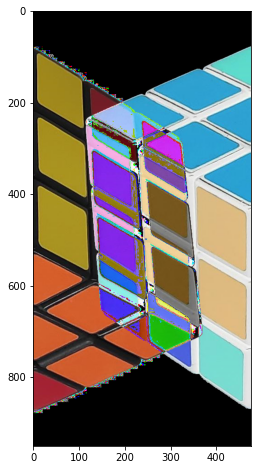

In [39]:
# Plot abs_different
plt.figure(figsize=(8, 8))
plt.imshow(abs_different)
plt.show()

**Task:** What is the meaning of the **colored** areas in the difference image? Why are some parts of the image black?

Write your answer here:


# Point Transformation 
Points will be the second most important data type after images in this course. 
In the following we have given an L-shaped point cloud [2xn] (*n=200*), on which we want to apply some transformations. Visualizing points can be done in a very similar way as in matlab (with the function *plt.plot(x,y,...)* )

**Tasks:**
1. Visualize the point cloud. (1 Point)
1. Write a function angle2rotMat(...) that returns the rotation matrix [2x2] for a given rotation angle (in degree). (1 Point)
2. Write for the function a Header which describes what the function is doing, as well as the input and output parameter. **Hint** An example of this can be seen in the first tutorial. (1 Point)
3. Create the 2 rotation matrices *R1* and *R2*: the first with an angle of 30[degree] and the second with an angle of 60[degree]. Print both matrices. (1 Point)
4. Rotate the given point cloud by *R1* and save the result in *points_r1*. Be aware of the difference between a matrix multiplication and an elementwise multiplication. (0.5 Points)
5. Rotate *points_r1* by *R2* and save the result in *points_r2*. (0.5 Points)
6. Shift points_r2 by the *translation=(3,4)^T* and save the result in *points_t*. (1 Points)
7. Create a figure with 4 subplots. Plot *points*, *points_r1*, *points_r2* and *points_t* in the created subplots, respectively. (3 Points)

In [41]:
# generating an L-shaped point cloud.
np.random.seed(0)
points = np.hstack([np.array([[5,0.5]]).T* np.random.rand(2,100),np.array([[0.5,5]]).T*np.random.rand(2,100)])
print('Point cloud dimension:',points.shape)

Point cloud dimension: (2, 200)


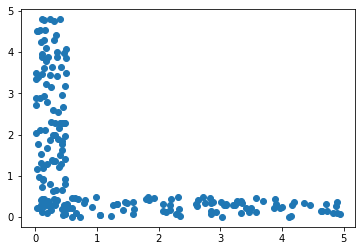

In [45]:
#1. Visualize the point cloud
x, y = points
plt.scatter(x, y)
plt.show()

In [61]:
#2. Rotation matrix function to rotate
def angle2rotMat(a):
    """Description of the Function

    Parameters:
    a (int): angle of rotation

    Returns:
    np.array (2x2): The rotation matrix

   """
    a_rad = np.radians(a)
    return np.array([
        [np.cos(a_rad), -np.sin(a_rad)],
        [np.sin(a_rad), np.cos(a_rad)]
    ])

In [62]:
#4. Create the rotation matrix 30 and 60 degree 
R1 = angle2rotMat(30)
R2 = angle2rotMat(60)

print(R1)
print(R2)

[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]
[[ 0.5       -0.8660254]
 [ 0.8660254  0.5      ]]


(2, 200)
(2, 200)
True


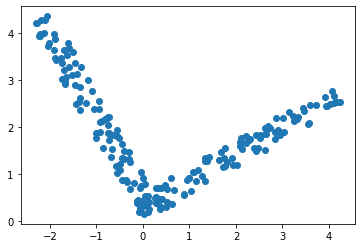

In [63]:
#5. Rotate the given point by R1, save the result in points_r1.
points_r1 = np.matmul(angle2rotMat(30), points)
print(points_r1.shape)
points_r1_2 = np.dot(angle2rotMat(30), points)
print(points_r1_2.shape)
print((points_r1 == points_r1_2).all())

x, y = points_r1
plt.scatter(x, y)
plt.show()

In [64]:
#6. Rotate the points_r1 by R2, save result in points_r2
points_r2 = np.matmul(R2, points_r1)

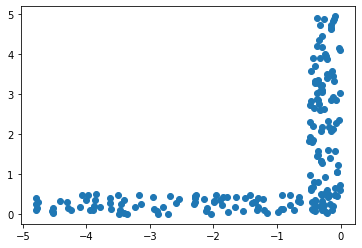

In [65]:
# Display 
x, y = points_r2
plt.scatter(x, y)
plt.show()

In [71]:
#7. Shift points_r2 by the Translation=(3, 4)^T and save in points_t.
x, y = points_r2
points_t = np.array([x + 3, y + 4])
points_t.shape

(2, 200)

(200,)


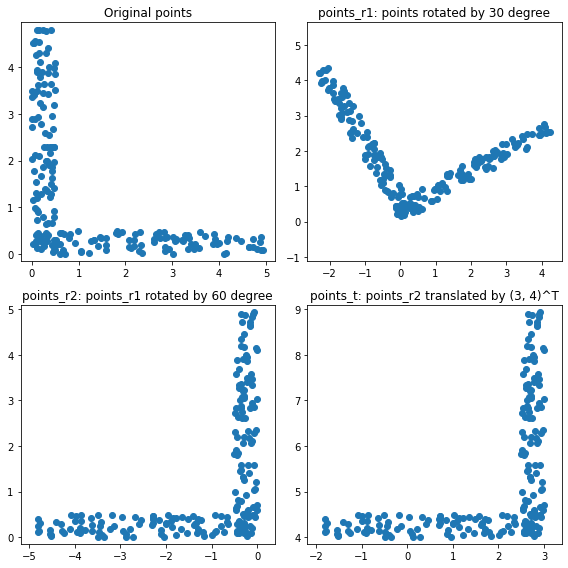

In [83]:
#8. Create figure with 4 subplot
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
# ax = axes.ravel()

x, y = points
print(x.shape)
ax[0, 0].scatter(x, y)
ax[0, 0].set_title('Original points')
ax[0, 0].axis('equal')

x, y = points_r1
ax[0, 1].scatter(x, y)
ax[0, 1].set_title('points_r1: points rotated by 30 degree')
ax[0, 1].axis('equal')

x, y = points_r2
ax[1, 0].scatter(x, y)
ax[1, 0].set_title('points_r2: points_r1 rotated by 60 degree')
ax[1, 0].axis('equal')

x, y = points_t
ax[1, 1].scatter(x, y)
ax[1, 1].set_title('points_t: points_r2 translated by (3, 4)^T')
ax[1, 1].axis('equal')

fig.tight_layout()
plt.show() 

# Task Completed

(10,)


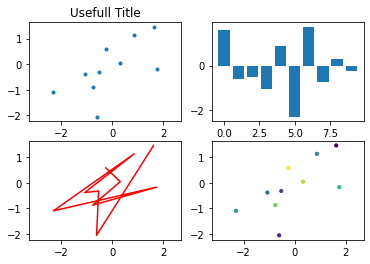

In [78]:
# Matplotlib example: Subplots

# create Some data
np.random.seed(1)
some_data = np.random.randn(2,10)

# Define Subplots
fig_ex1, axes_ex1 = plt.subplots(nrows=2,ncols=2)

# Assign 
# Draw points
print(some_data[0].shape)
axes_ex1[0,0].plot(some_data[0], some_data[1],marker='.',linestyle='')
axes_ex1[0,0].set_title('Usefull Title')
axes_ex1[0,0].axis('equal')

# Plot Bars
axes_ex1[0,1].bar(np.arange(10), some_data[0])

# Connect points by lines
axes_ex1[1,0].plot(some_data[0], some_data[1],linestyle='-',color='r')
axes_ex1[1,0].axis('equal')

# Draw points (optional: different, )
axes_ex1[1,1].scatter(some_data[0], some_data[1], s=10, c=np.arange(10), cmap='viridis')
axes_ex1[1,1].axis('equal')
plt.show()

In [42]:
# Helper for Point Transformation

data = np.array([
    [1, 2],
    [2, 3],
    [3, 6],
])

In [43]:
data.shape

(3, 2)

In [44]:
data.T

array([[1, 2, 3],
       [2, 3, 6]])